<a href="https://colab.research.google.com/github/milu234/Project_Perseverance/blob/main/Dealing_with_non_linear_relationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DeepLearning/HousingData.csv')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import sklearn



In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

In [3]:
df.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows

In [4]:
y = boston_data.target

In [5]:
# print(f"The value of y is {y}")

# **Brief Introduction to Decision tree**

Using Decision Tree Regressor

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
X = df[['LSTAT']].values

In [8]:
tree = DecisionTreeRegressor(max_depth=5)

In [9]:
tree.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [10]:
sort_idx = X.flatten().argsort()

Text(0, 0.5, 'MEDV')

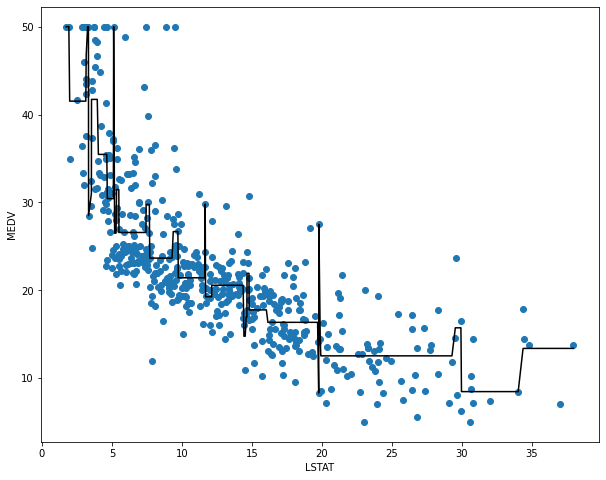

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx],tree.predict(X[sort_idx]),color='k')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [13]:
X = df.values


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=42, n_jobs=1)

In [17]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [18]:
y_train_pred = forest.predict(X_train)

In [19]:
y_test_pred = forest.predict(X_test)

In [20]:
mse_train = mean_squared_error(y_train , y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
print(f'MSE TRAIN : {mse_train}')
print(f'MSE TEST : {mse_test}')

MSE TRAIN : 1.8700342163841717
MSE TEST : 9.392062673421051


In [21]:
R_squared_train = r2_score(y_train , y_train_pred)
R_squared_test = r2_score(y_test,y_test_pred)
print(f'R-squared TRAIN : {R_squared_train}')
print(f'R-squared TEST : {R_squared_test}')

R-squared TRAIN : 0.9787245955118005
R-squared TEST : 0.8739542009113459


# **Brief Introduction to AdaBoost**

In [22]:
from sklearn.ensemble import AdaBoostRegressor

In [23]:
ada  = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=500, random_state=42)

In [24]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [25]:
y_train_pred = ada.predict(X_train)

In [26]:
y_test_pred = ada.predict(X_test)

In [27]:
mse_train = mean_squared_error(y_train , y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
print(f'MSE TRAIN : {mse_train}')
print(f'MSE TEST : {mse_test}')

MSE TRAIN : 4.660495418580552
MSE TEST : 13.494910482902208


In [28]:
R_squared_train = r2_score(y_train , y_train_pred)
R_squared_test = r2_score(y_test,y_test_pred)
print(f'R-squared TRAIN : {R_squared_train}')
print(f'R-squared TEST : {R_squared_test}')

R-squared TRAIN : 0.9469774807984944
R-squared TEST : 0.8188920970192286


# RANSAC Regressor

> Indented block



In [29]:
X = df['RM'].values.reshape(-1,1)
print(f'DF Columns {df.columns}')
y = df['LSTAT'].values

DF Columns Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [30]:
from sklearn.linear_model import RANSACRegressor

In [31]:
ransac = RANSACRegressor()

In [32]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [33]:
inlier_mask = ransac.inlier_mask_

In [34]:
outlier_mask = np.logical_not(inlier_mask)

In [35]:
np.arange(3,10,1)

array([3, 4, 5, 6, 7, 8, 9])

In [36]:
line_X = np.arange(3,10,1)

line_y_ransac = ransac.predict(line_X.reshape(-1,1))


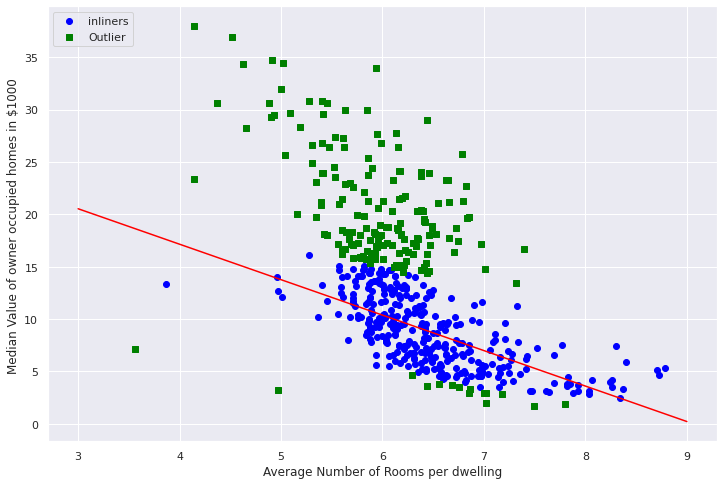

In [37]:
 sns.set(style='darkgrid',context =  'notebook')
 plt.figure(figsize=(12,8))
 plt.scatter(X[inlier_mask] , y[inlier_mask], c = 'blue' , marker='o' , label = 'inliners')
 plt.scatter(X[outlier_mask] , y [outlier_mask] , c = 'green' , marker='s' , label = 'Outlier')
 plt.plot(line_X , line_y_ransac,color = 'red')
 plt.xlabel("Average Number of Rooms per dwelling")
 plt.ylabel("Median Value of owner occupied homes in $1000 ")
 plt.legend(loc = 'upper left')
 plt.show()

In [38]:
ransac.estimator_.coef_

array([-3.38654821])

In [39]:
ransac.estimator_.intercept_

30.69566711919996

Evaluate Performance of a Regression Model

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.iloc[:,:-1].values

In [42]:
y = boston_data.target

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 0)

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [45]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_train_pred = lr.predict(X_train)


In [47]:
y_test_pred = lr.predict(X_test)

# **Method 1 : Residual Analysis**

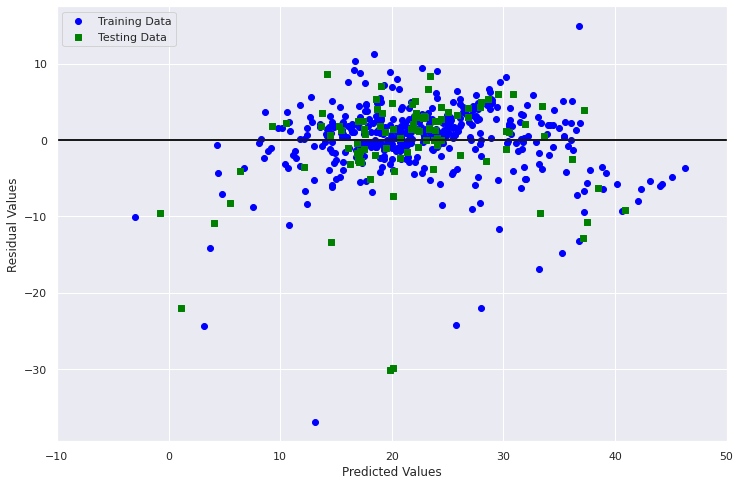

In [48]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred , y_train_pred-y_train,c = 'blue' , marker = 'o' , label = 'Training Data')
plt.scatter(y_test_pred , y_test_pred-y_test,c = 'green' , marker = 's' , label = 'Testing Data')
plt.xlabel('Predicted Values')
plt.ylabel("Residual Values")
plt.legend(loc = 'upper left')
plt.hlines(y=0,xmin = -10, xmax = 50, lw=2, color = 'k')
plt.xlim([-10, 50])
plt.show()

# **Method 2: Mean Squared Error(MSE)**

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(y_train, y_train_pred)

23.417088948696783

In [51]:
mean_squared_error(y_test , y_test_pred)

41.57943357713574

# **Method 3 : Coefficient of determination**

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_train,y_train_pred)

0.7249698640460449

In [54]:
r2_score(y_test, y_test_pred)

0.48937454707281813

# Near Perfect Model

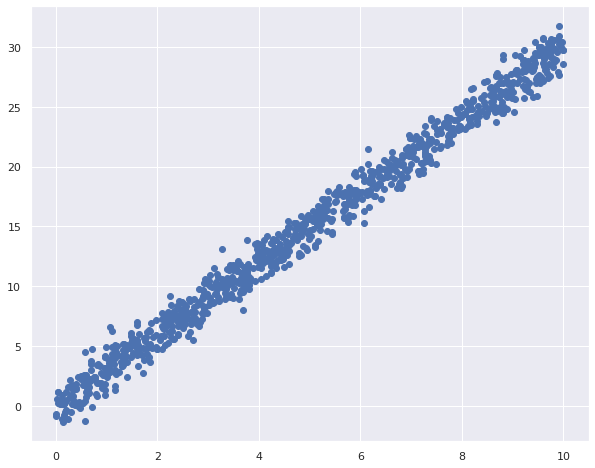

In [55]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3*x + np.random.randn(1000)
plt.figure(figsize=(10,8))
plt.scatter(x,y);
plt.show()

In [56]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.3, random_state=0)

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1, 1), y_train)

y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1,1))

# **Method 1 : Residual Analysis**

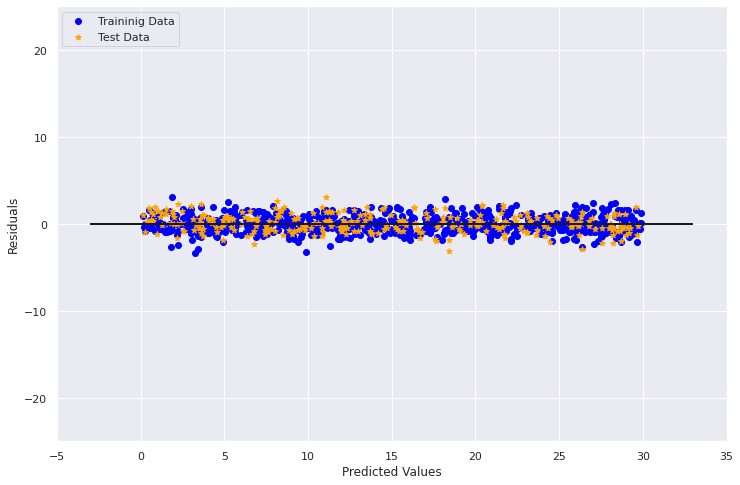

In [60]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train , c='blue', marker = 'o', label='Traininig Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange' , marker='*' , label='Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5,35])
plt.ylim([-25,25])
plt.show()

New Mean Square Error

In [62]:
print(f'The new mean squared error of the train is {mean_squared_error(y_train,y_train_pred)}')

The new mean squared error of the train is 0.9979119570272654


In [63]:
print(f'The new mean squared error of the test is {mean_squared_error(y_test, y_test_pred)}')

The new mean squared error of the test is 1.0451140758583257


In [65]:
print(f'The coefficient of determination of the train is {r2_score(y_train, y_train_pred)}')

The coefficient of determination of the test is 0.9867477693894975


In [66]:
print(f'The coefficient of the determination of the train is {r2_score(y_test,y_test_pred)}')

The coefficient of the determination of the train is 0.986874160992915
